In [32]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
from sklearn.preprocessing import scale
import math
plt.rcParams['font.family'] = 'Malgun Gothic' ## 그래프에서 한글보이도록 폰트설정



# 코로나 데이터 불러오기

In [33]:
grouped1 = pd.read_csv('./COVID_19/TimeProvince.csv')
grouped1 = grouped1[grouped1.province=='서울']


In [34]:
grouped1 = grouped1.rename({'confirmed':'확진자수','week':'주차'}, axis ='columns')
grouped1

,date,time,province,확진자수,released,deceased
0,2020-01-20,16,서울,0,0,0
17,2020-01-21,16,서울,0,0,0
34,2020-01-22,16,서울,0,0,0
51,2020-01-23,16,서울,0,0,0
68,2020-01-24,16,서울,0,0,0
...,...,...,...,...,...,...
2686,2020-06-26,0,서울,1267,843,7
2703,2020-06-27,0,서울,1284,911,7
2720,2020-06-28,0,서울,1298,923,7
2737,2020-06-29,0,서울,1305,942,7


In [35]:
my_list = np.array(grouped1['확진자수'])

new_list = np.ones((len(my_list)),dtype = np.int64)

for i in range(len(my_list)):
    if i == 0:
        new_list[i]=my_list[i]
    else:
        new_list[i] = my_list[i]-my_list[i-1]
new_list

grouped1['일일확진자'] = new_list
grouped1

,date,time,province,확진자수,released,deceased,일일확진자
0,2020-01-20,16,서울,0,0,0,0
17,2020-01-21,16,서울,0,0,0,0
34,2020-01-22,16,서울,0,0,0,0
51,2020-01-23,16,서울,0,0,0,0
68,2020-01-24,16,서울,0,0,0,0
...,...,...,...,...,...,...,...
2686,2020-06-26,0,서울,1267,843,7,17
2703,2020-06-27,0,서울,1284,911,7,17
2720,2020-06-28,0,서울,1298,923,7,14
2737,2020-06-29,0,서울,1305,942,7,7


In [38]:
grouped1 =grouped1.reset_index()

In [40]:
del grouped1['time']
del grouped1['province']
del grouped1['released']
del grouped1['deceased']

grouped1




,index,date,확진자수,일일확진자
0,0,2020-01-20,0,0
1,17,2020-01-21,0,0
2,34,2020-01-22,0,0
3,51,2020-01-23,0,0
4,68,2020-01-24,0,0
...,...,...,...,...
158,2686,2020-06-26,1267,17
159,2703,2020-06-27,1284,17
160,2720,2020-06-28,1298,14
161,2737,2020-06-29,1305,7


In [45]:
grouped1['주차'] = grouped1.index +20
grouped1['주차'] = grouped1['주차']/7+1
grouped1 = grouped1.astype({'주차': 'int'})
grouped1

,index,date,확진자수,일일확진자,주차
0,0,2020-01-20,0,0,3
1,17,2020-01-21,0,0,4
2,34,2020-01-22,0,0,4
3,51,2020-01-23,0,0,4
4,68,2020-01-24,0,0,4
...,...,...,...,...,...
158,2686,2020-06-26,1267,17,26
159,2703,2020-06-27,1284,17,26
160,2720,2020-06-28,1298,14,26
161,2737,2020-06-29,1305,7,26


# 유동인구 데이터 불러오기

In [47]:
# 유동인구 데이터 불러오기

f = pd.read_csv("fpopl.csv")
df = pd.DataFrame(f)
df.shape

# 행정동 데이터 불러오기

f2 = pd.read_csv("adstrd_master.csv")
df2 = pd.DataFrame(f2)

df2.shape

(3493, 4)

In [48]:
# df와 df2 합치기 (유동인구['adstrd_code'] = 행정동['adstrd_code'])
#                          * adstrd_code = 행정동코드
# 유동인구 데이터와 행정동 이름 합침
# SQL의 LEFT JOIN

move_people = pd.merge(df,df2,on="adstrd_code",how="left")
move_people.head()

,base_ymd,tmzon_se_code,sexdstn_se_code,agrde_se_code,adstrd_code,popltn_cascnt,adstrd_nm,brtc_nm,signgu_nm
0,20200101,0,M,age_00,11650560,15,반포1동,서울특별시,서초구
1,20200101,0,M,age_00,11590620,6,사당1동,서울특별시,동작구
2,20200101,0,M,age_00,11560710,4,대림2동,서울특별시,영등포구
3,20200101,0,M,age_00,11470680,12,신정7동,서울특별시,양천구
4,20200101,0,M,age_00,11350665,6,상계3.4동,서울특별시,노원구


In [49]:
del move_people['brtc_nm']

# brtc_nm은 시도 명이다.
# 현 DATASET은 서울시 내 행정구역 데이터이기 때문에, brtc_nm 칼럼 삭제

move_people = move_people.rename({'base_ymd':'년월일','tmzon_se_code':'시간대','sexdstn_se_code':'성별','agrde_se_code':'나이대','adstrd_code':'행정동코드','popltn_cascnt':'유동인구','adstrd_nm':'행정동','signgu_nm':'행정구'}, axis ='columns')

grouped = move_people.groupby(by = ['년월일','행정구']).sum()['유동인구'].reset_index()

grouped

,년월일,행정구,유동인구
0,20200101,강남구,3028808
1,20200101,강동구,2094980
2,20200101,강북구,945218
3,20200101,강서구,2191177
4,20200101,관악구,1694584
...,...,...,...
4195,20200616,용산구,2363994
4196,20200616,은평구,1610731
4197,20200616,종로구,1992243
4198,20200616,중구,2253617


In [50]:
temp = grouped
del temp['행정구']
temp = temp.groupby(by = ['년월일']).sum()['유동인구'].reset_index()
temp

,년월일,유동인구
0,20200101,45208028
1,20200102,55749874
2,20200103,59151121
3,20200104,54474173
4,20200105,46903976
...,...,...
163,20200612,60942009
164,20200613,54872785
165,20200614,46161661
166,20200615,58717583


In [51]:
temp['일자'] = temp.index+1
temp

,년월일,유동인구,일자
0,20200101,45208028,1
1,20200102,55749874,2
2,20200103,59151121,3
3,20200104,54474173,4
4,20200105,46903976,5
...,...,...,...
163,20200612,60942009,164
164,20200613,54872785,165
165,20200614,46161661,166
166,20200615,58717583,167


In [52]:
temp['주차'] = temp['일자']/7+1
temp = temp.astype({'주차': 'int'})
temp

,년월일,유동인구,일자,주차
0,20200101,45208028,1,1
1,20200102,55749874,2,1
2,20200103,59151121,3,1
3,20200104,54474173,4,1
4,20200105,46903976,5,1
...,...,...,...,...
163,20200612,60942009,164,24
164,20200613,54872785,165,24
165,20200614,46161661,166,24
166,20200615,58717583,167,24


# 2개의 데이터프레임 합치기

In [53]:
final_df = pd.merge(grouped1,temp,on="주차",how="left")
final_df

,index,date,확진자수,일일확진자,주차,년월일,유동인구,일자
0,0,2020-01-20,0,0,3,20200114.0,58687051.0,14.0
1,0,2020-01-20,0,0,3,20200115.0,59028326.0,15.0
2,0,2020-01-20,0,0,3,20200116.0,59301598.0,16.0
3,0,2020-01-20,0,0,3,20200117.0,61384697.0,17.0
4,0,2020-01-20,0,0,3,20200118.0,57223784.0,18.0
...,...,...,...,...,...,...,...,...
1046,2686,2020-06-26,1267,17,26,NaN,NaN,NaN
1047,2703,2020-06-27,1284,17,26,NaN,NaN,NaN
1048,2720,2020-06-28,1298,14,26,NaN,NaN,NaN
1049,2737,2020-06-29,1305,7,26,NaN,NaN,NaN


# 그래프그리기

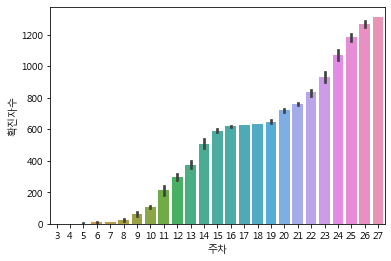

In [54]:
import seaborn as sns

l1 = sns.barplot(x="주차", y="확진자수",data=grouped1)
# plt.title("서울시 주차별 코로나 확진자 변화")



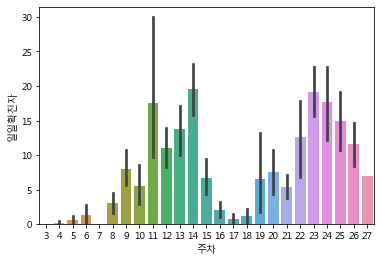

In [77]:
l1 = sns.barplot(x="주차", y="일일확진자",data=grouped1)

[(0.0, 27.0)]

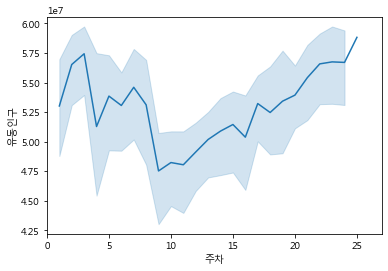

In [78]:
l2 = sns.lineplot(x="주차", y="유동인구",data=temp)
l2.set(xlim=(0, 27))

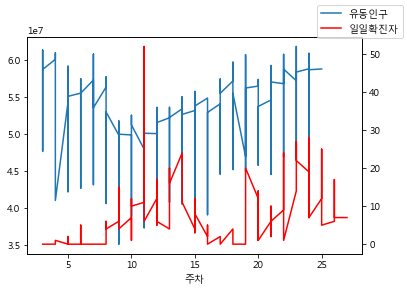

In [62]:
ax = final_df.plot(x="주차", y="유동인구", legend=False)
ax2 = ax.twinx()
final_df.plot(x="주차", y="일일확진자", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

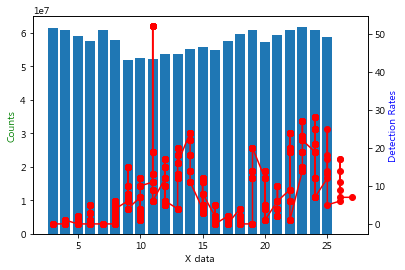

In [65]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(final_df['주차'], final_df['유동인구'])
ax2.plot(final_df['주차'], final_df['일일확진자'], 'o-', color="red" )

ax1.set_xlabel('X data')
ax1.set_ylabel('Counts', color='g')
ax2.set_ylabel('Detection Rates', color='b')

plt.show()

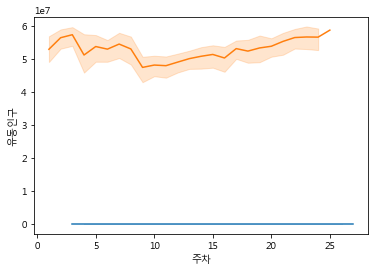

In [71]:
l1 = sns.lineplot(x="주차", y="일일확진자",data=grouped1)
l2 = sns.lineplot(x="주차", y="유동인구",data=temp)
plt.show()